# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/1RfTcEwdSoZ6NvNqaL9pNUiqI54jS3ztW?usp=sharing)

https://wikidocs.net/150781

07-03 행렬곱으로 이해하는 신경망

인공 신경망에서 입력층에서 출력층 방향으로 연산을 진행하는 과정을 순전파(Forward Propagation)라고 합니다. 다르게 말하면 주어진 입력이 입력층으로 들어가서 은닉층을 지나 출력층에서 예측값을 얻는 과정을 순전파라고 합니다. 여기서는 신경망의 순전파는 결과적으로 행렬의 곱셈으로 이해할 수 있다는 것과 다층 퍼셉트론 내의 학습 가능한 매개변수인 가중치 w
와 편향 b
의 개수를 추정하는 방법에 대해서 학습합니다.

1. 순전파(Foward Propagation)

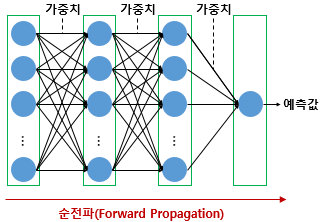

활성화 함수, 은닉층의 수, 각 은닉층의 뉴런 수 등 딥 러닝 모델을 설계하고나면 입력값은 입력층, 은닉층을 지나면서 각 층에서의 가중치와 함께 연산되며 출력층으로 향합니다. 그리고 출력층에서 모든 연산을 마친 예측값이 나오게 됩니다. 이와 같이 입력층에서 출력층 방향으로 예측값의 연산이 진행되는 과정을 순전파라고 합니다.

2. 행렬곱으로 순전파 이해하기

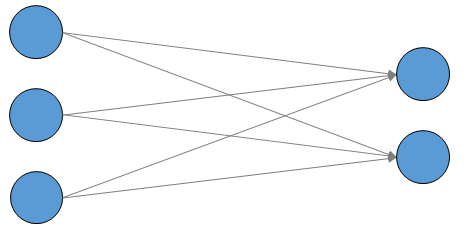

위와 같은 인공 신경망이 있다고 해봅시다. 입력의 차원이 3, 출력의 차원이 2인 위 인공 신경망을 구현해본다면 다음과 같습니다.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

#3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation = 'softmax'))

소프트맥스 회귀를 한다고 가정하고 활성화 함수는 소프트맥스 함수를 임의로 기재하였습니다. 인공 신경망이란 표현이 아직 어색한다면 앞에서 배운 소프트맥스 회귀 모델을 만들었다고 생각해도 되겠습니다. 소프트맥스 회귀는 출력 벡터의 차원을 2로 두면 이진 분류를 수행하는 모델이 됩니다. 로지스틱 회귀가 아닌 소프트맥스 회귀로도 이진 분류는 수행 가능함을 기억해둡시다.

케라스에서는 .summary()를 사용하면 해당 모델에 존재하는 모든 매개변수(가중치 w
와 편향 b
의 개수)를 확인할 수 있습니다.

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


매개변수의 수가 8개라고 나옵니다. 위 신경망에서 학습가능한 매개변수 인 w
와 b
의 개수가 총 합해서 8개라는 의미입니다. 실제로 그런지 위 신경망을 행렬의 곱셈 관점에서 이해해봅시다.

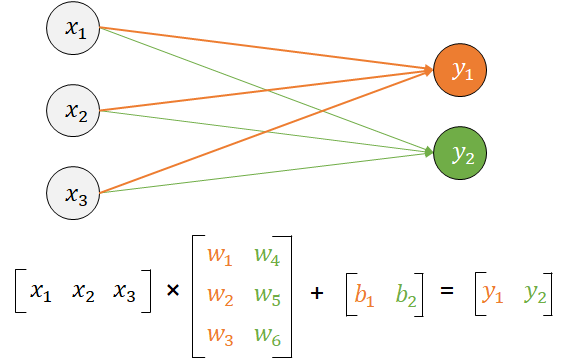

위 모델은 입력의 차원이 3, 출력의 차원이 2입니다. 또는 신경망의 용어로서 표현한다면, 입력층의 뉴런이 3개, 출력층의 뉴런이 2개라고 말할 수 있습니다. 위 신경망 그림에서 화살표 각각은 가중치 w
를 의미하고 있습니다. 3개의 뉴런과 2개의 뉴런 사이에는 총 6개의 화살표가 존재하는데, 이는 위 신경망에서 가중치 w
의 개수가 6개임을 의미합니다.

이를 행렬곱 관점에서는 3차원 벡터에서 2차원 벡터가 되기 위해서 3 × 2 행렬을 곱했다고 이해할 수 있습니다. 그리고 이 행렬 각각의 원소가 각각의 w
가 되는 것입니다. 위 그림에서는 y1
에 연결되는 화살표 w1, w2, w3
를 주황색으로 표현하고,
에 연결되는 화살표 w4, w5, w6를 초록색으로 표현했습니다.

일반적으로 동그란 뉴런과 화살표로 표현하는 인공 신경망의 그림에서는 편향 b
의 경우에는 편의상 생략되는 경우가 많지만, 인공 신경망 내부적으로는 편향 b
의 연산 또한 존재합니다. 위 그림에서 뉴런과 화살표로 표현한 인공 신경망의 그림에서는 편향을 표현하지 않았지만, 행렬 연산식에서는 b1
과 b2
를 표현하였습니다. 편향 b
의 개수는 항상 출력의 차원을 기준으로 개수를 확인하면 됩니다. 위의 인공 신경망의 경우에는 출력의 차원이 2인데, 이에 따라서 편향 또한 b1
과 b2
로 두 개입니다.

가중치 w
의 개수가 w1, w2, w3, w4, w5, w6로 총 6개이며 편향 b
의 개수가 b1
과 b2
로 두 개이므로 총 학습가능한 매개변수의 수는 8개입니다. 이는 앞서 model.summary()를 하였을 때 확인한 매개변수의 수인 8개와 일치합니다.

y1과 y2
를 구하는 과정을 수식으로 표현한다면 다음과 같이 표현할 수 있습니다.

h_{1} = x_{1}w_{1} + x_{2}w_{2} + x_{3}w_{3} + b_{1}

h_{2} = x_{1}w_{4} + x_{2}w_{5} + x_{3}w_{6} + b_{2}

[y_{1}, y_{2}] = softmax([h_{1}, h_{2}])

좀 더 간단하게 식을 표현해보겠습니다. 입력 x1
, x2
, x3
을 벡터 X
로 명명합니다.

X = [x1, x2, x3]

그리고 w1, w2, w3, w4, w5, w6를 원소로 하는 3 × 2 행렬을 가중치 행렬 W
, 그리고 편향 b1,b2

를 원소로 하는 벡터를 B
, 그리고 y1, y2를 원소로하는 출력 벡터를 Y
로 명명합시다. 이 경우, 위의 인공 신경망은 다음과 같이 표현할 수 있습니다.

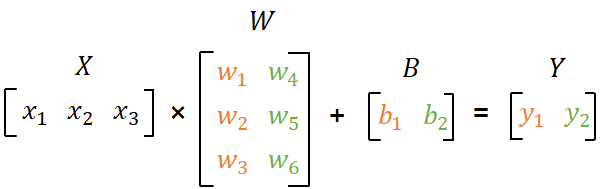

다시 말해 수식은 다음과 같습니다.\
Y = XW + B

3. 행렬곱으로 병렬 연산 이해하기

인공 신경망을 행렬곱으로 구현할 때의 흥미로운 점은 행렬곱을 사용하면 병렬 연산도 가능하다는 점입니다. 위의 예시에서는 데이터 중 1개의 샘플만을 처리한다고 가정했습습니다. 이번에는 인공 신경망이 4개의 샘플을 동시에 처리해본다고 가정해봅시다. 4개의 샘플을 하나의 행렬 X
로 정의하고 인공 신경망의 순전파를 행렬곱으로 표현하면 다음과 같습니다.

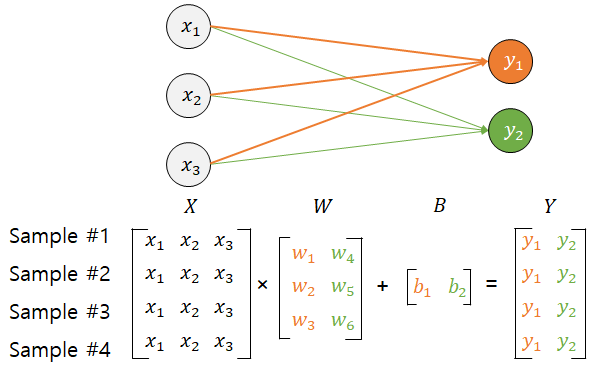

4. 행렬곱으로 다층 퍼셉트론의 순전파 이해하기

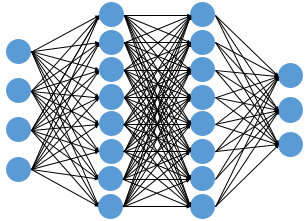

위와 같은 인공 신경망이 있다고 합시다. 주어진 인공 신경망을 케라스로 구현해본다면 아래와 같이 구현할 수 있습니다.

1) 코드로 구현하기

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
model = Sequential()

In [5]:
#4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation = 'relu'))

#이어서 8개의 출력
model.add(Dense(8, activation = 'relu'))

#이어서 3개의 출력
model.add(Dense(3, activation = 'softmax'))

위의 코드의 주석에서 () 괄호 안의 값은 각 층에서의 뉴런의 수를 의미하며 입력층부터 출력층까지 순차적으로 인공 신경망의 층을 한 층씩 추가하였습니다. 케라스를 사용하면 이렇게 간단하게 층을 딥하게 쌓은 딥 러닝 모델을 구현할 수 있습니다.

2) 행렬의 크기 추정해보기

우선 각 층을 기준으로 입력과 출력의 개수를 정리하면 다음과 같습니다.

입력층 : 4개의 입력과 8개의 출력\
은닉층1 : 8개의 입력과 8개의 출력\
은닉층2 : 8개의 입력과 3개의 출력\
출력층 : 3개의 입력과 3개의 출력

위의 정보를 가지고 층마다 생기는 가중치와 편향 행렬의 크기를 추정해봅시다. 단, 배치 크기는 1을 가정합니다.

1. 입력층 ⇒ 은닉층1

앞서 벡터와 행렬 연산을 설명하며 배운 바에 따르면, 입력 행렬, 가중치 행렬, 편향 행렬, 출력 행렬은 다음과 같은 크기 관계를 가집니다.

X_{m\ \text{×}\ n} × W_{n\ \text{×}\ j} + B_{m\ \text{×}\ j} = Y_{m\ \text{×}\ j}

layer 1의 입력 행렬 X
 의 크기는 1 × 4입니다. layer 1의 출력은 8개이므로, 그에 따라 출력 행렬 Y
의 크기는 1 × 8이 됩니다.

X_{1\ \text{×}\ 4} × W_{n\ \text{×}\ j} + B_{m\ \text{×}\ j} = Y_{1\ \text{×}\ 8}

그런데 가중치 행렬 W
의 행은 입력 행렬 X
의 열과 같아야 하므로 아래와 같습니다.

X_{1\ \text{×}\ 4} × W_{4\ \text{×}\ j} + B_{m\ \text{×}\ j} = Y_{1\ \text{×}\ 8}

편향 행렬 B
는 출력 행렬 Y
의 크기에 영향을 주지 않으므로 편향 행렬 B
의 크기는 출력 행렬 Y
의 크기와 같습니다.

X_{1\ \text{×}\ 4} × W_{4\ \text{×}\ j} + B_{1\ \text{×}\ 8} = Y_{1\ \text{×}\ 8}

가중치 행렬 W
의 열은 출력 행렬 Y
의 열과 동일해야 합니다.

X_{1\ \text{×}\ 4} × W_{4\ \text{×}\ 8} + B_{1\ \text{×}\ 8} = Y_{1\ \text{×}\ 8}

입력층과 은닉층1 사이의 가중치 행렬과 편향 행렬의 크기를 구했습니다.

2. 은닉층1 ⇒ 은닉층2

이제 입력층 ⇒ 은닉층1에서의 출력 행렬 Y
는 은닉층2에서는 입력 행렬 X
로 다시 명명해봅시다.

은닉층1 ⇒ 은닉층2 : X1x8 * W8x8 + B1x8 = Y1x8

3. 은닉층2 ⇒ 은닉층3

이제 은닉층2 ⇒ 은닉층3에서의 출력 행렬
는 은닉층3에서는 입력 행렬
로 다시 명명해봅시다.

은닉층2 ⇒ 은닉층3 : X1x8 x W8x3 + B1x3 = Y1x3

은닉층과 출력층에 활성화 함수 relu와 softmax가 존재하지만 활성화 함수는 행렬의 크기에 영향을 주지 않습니다.

인공 신경망이 입력층에서 은닉층을 지나 출력층에서 예측값을 계산하기까지의 과정을 행렬 연산으로 가정하고 행렬의 크기를 추정해보았습니다. 이와 같이 순전파를 진행하고 예측값을 구하고나서 이 다음에 인공 신경망이 해야할 일은 예측값과 실제값으로부터 오차를 계산하고, 오차로부터 가중치와 편향을 업데이트하는 일입니다. 즉, 인공 신경망의 학습 단계에 해당됩니다. 이때 인공 신경망은 순전파와는 반대 방향으로 연산을 진행하며 가중치를 업데이트하는데, 이 과정을 역전파(BackPropagation)라고 합니다. 인공 신경망의 역전파에 대해서는 뒤에서 다룹니다.